In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

print('sklearn: {}'. format(sklearn. __version__))

# Read in the data
df = pd.read_csv('sleep_health_and_lifestyle_dataset.csv')

# Drop data we're not using
data = df.copy().drop(['Person ID', 'Occupation', 'Sleep Disorder', 'Blood Pressure'], axis = 1)

# Rename columns
data.rename(columns = {'BMI Category': 'BMI', 'Quality of Sleep': 'Sleep Quality', 'Physical Activity Level': 'Physical Activity'}, inplace = True)

# Convert BMI normal weight -> normal
data['BMI'] = np.where(data['BMI'] == 'Normal Weight', 'Normal', data['BMI'])


# Convert categorical data to numerical data
# Convert BMI strings to numbers
data['BMI'].replace(["Normal", "Overweight", "Obese"], [0, 1, 2], inplace=True)

# Convert Gender Strings to Numbers: Male to 1 and Female to 0
data['Gender'] = np.where(data['Gender'] == 'Male', 1, 0)

sklearn: 1.3.0


In [20]:
# Consider what predictor variables we want to use
sleepDuration = data['Sleep Duration']
sleepQuality = data['Sleep Quality']
stressLevel = data['Stress Level']

# Create a dataframe with the predictor variables
pred = pd.DataFrame(data={'Sleep Duration': sleepDuration, 'Sleep Quality': sleepQuality, 'Stress Level': stressLevel})

# Drop class we want to predict: Stress Level
X = pred.copy().drop(['Stress Level'], axis=1)
y = pred['Stress Level']

In [21]:
# linear regression model

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_trainPred = lr.predict(X_train)
y_testPred = lr.predict(X_test)

# Round the predictions to the nearest integer
y_trainPred = np.round(y_trainPred)
y_testPred = np.round(y_testPred)

In [22]:
from sklearn.model_selection import cross_val_score

# Calculate Cross Validation Scores for 15 folds
r2Train = cross_val_score(lr, X_train, y_train, cv=15, scoring='r2')
mseTrain = -1 * cross_val_score(lr, X_train, y_train, cv=15, scoring='neg_mean_squared_error')
r2Test = cross_val_score(lr, X_test, y_test, cv=15, scoring='r2')
mseTest = -1 * cross_val_score(lr, X_test, y_test, cv=15, scoring='neg_mean_squared_error')

print(f'Mean Squared Error Train: {mseTrain}\n')
print(f'R^2 Train: {r2Train}\n')

print(f'Average Mean Squared Error Train: {np.mean(mseTrain)}')
print(f'Average R^2 Train: {np.mean(r2Train)}\n')

print(f'Mean Squared Error Test: {mseTest}\n')
print(f'R^2 Test: {r2Test}\n')

print(f'Average Mean Squared Error Test: {np.mean(mseTest)}')
print(f'Average R^2 Test: {np.mean(r2Test)}')

Mean Squared Error Train: [0.41768498 0.3315443  0.75674829 0.54659477 1.13966797 0.52796481
 0.72042284 0.66385671 0.58833032 0.31343179 0.48712931 0.38562237
 0.49949492 0.32792841 0.82505811]

R^2 Train: [0.81518364 0.90095764 0.76643571 0.82851929 0.56166616 0.83742423
 0.73778968 0.75042981 0.82897374 0.90808452 0.84729489 0.88624709
 0.85426844 0.90487936 0.77538011]

Average Mean Squared Error Train: 0.5687653265457946
Average R^2 Train: 0.8135689542362885

Mean Squared Error Test: [1.42244667 0.52465434 0.58468368 1.43010772 0.10742687 0.85317137
 0.87939219 0.06391693 0.77370788 1.13510065 1.30869432 1.14161639
 0.36602803 0.63724225 0.9524571 ]

R^2 Test: [ 0.34145987  0.49552467  0.72931311  0.33791309  0.92539801  0.51524354
  0.52206946  0.97040883  0.78508114  0.38309747  0.50428245  0.49034983
  0.8692757  -0.59310562  0.20628575]

Average Mean Squared Error Test: 0.812043091630738
Average R^2 Test: 0.4988398222814


     Sleep Duration  Sleep Quality
119             7.2              8
192             6.5              6
365             8.0              9
148             6.9              7
308             6.6              7
..              ...            ...
77              6.0              6
38              7.6              7
204             7.6              8
186             6.7              7
243             6.5              7

[299 rows x 2 columns]


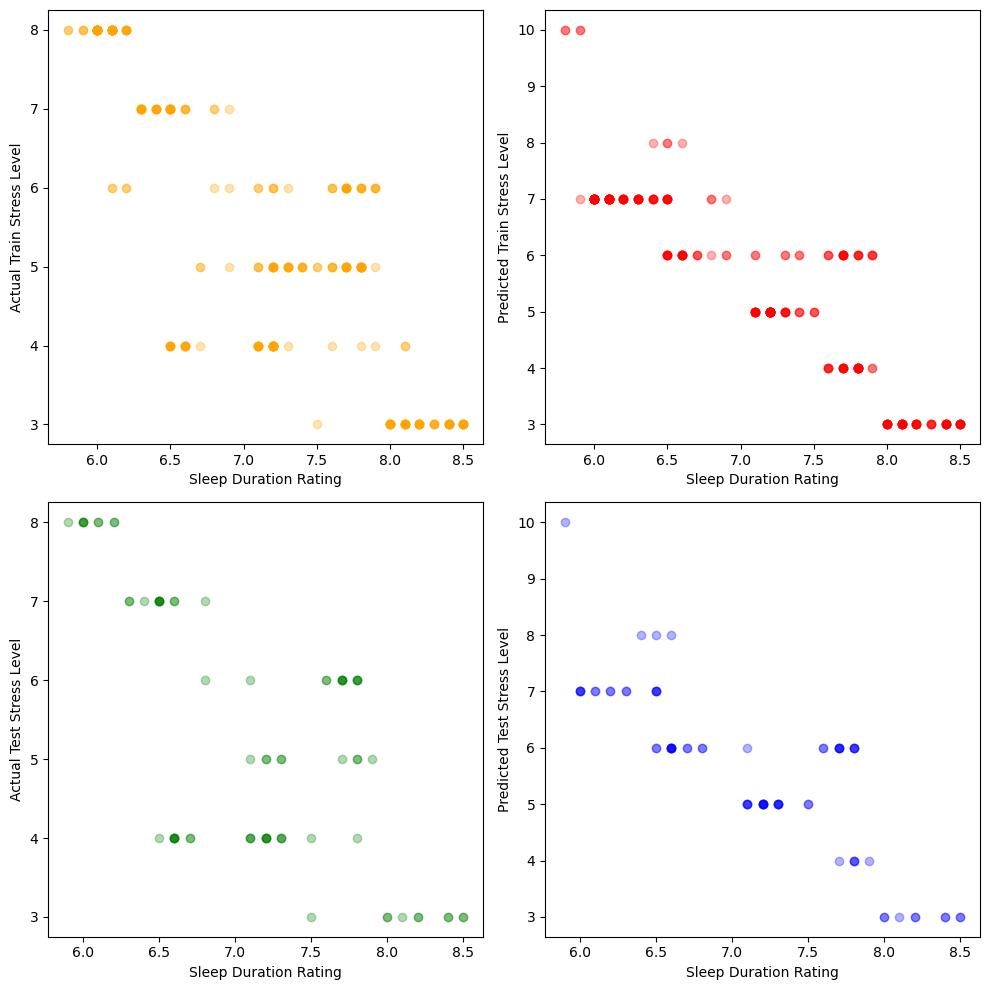

In [23]:
# Create scatterplots for train sleep duration & predicted train stress level

fig, axes = plt.subplots(2,2,figsize=(10,10))
axes = axes.flatten()

print(X_train)

# Plot Train Data vs Train Predictions
axes[0].scatter(x=X_train['Sleep Duration'], y=y_train, color='orange', alpha=0.3)
axes[0].set(xlabel='Sleep Duration Rating', ylabel='Actual Train Stress Level')
axes[1].scatter(x=X_train['Sleep Duration'], y=y_trainPred, color='red', alpha=0.3)
axes[1].set(xlabel='Sleep Duration Rating', ylabel='Predicted Train Stress Level')

# Plot Test Data vs Test Predictions
axes[2].scatter(x=X_test['Sleep Duration'], y=y_test, color='green', alpha=0.3)
axes[2].set(xlabel='Sleep Duration Rating', ylabel='Actual Test Stress Level')
axes[3].scatter(x=X_test['Sleep Duration'], y=y_testPred, color='blue', alpha=0.3)
axes[3].set(xlabel='Sleep Duration Rating', ylabel='Predicted Test Stress Level')
plt.tight_layout()
plt.show()

MLR Training Classification Report:
               precision    recall  f1-score   support

           3       0.96      0.96      0.96        56
           4       0.63      0.88      0.73        56
           5       0.79      0.53      0.63        49
           6       0.88      0.78      0.82        36
           7       1.00      0.88      0.94        41
           8       0.95      1.00      0.98        61

    accuracy                           0.85       299
   macro avg       0.87      0.84      0.84       299
weighted avg       0.86      0.85      0.85       299

Accuracy: 0.8494983277591973

MLR Testing Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00        15
           4       0.64      1.00      0.78        14
           5       1.00      0.67      0.80        18
           6       0.89      0.80      0.84        10
           7       1.00      0.78      0.88         9
           8       0.90      

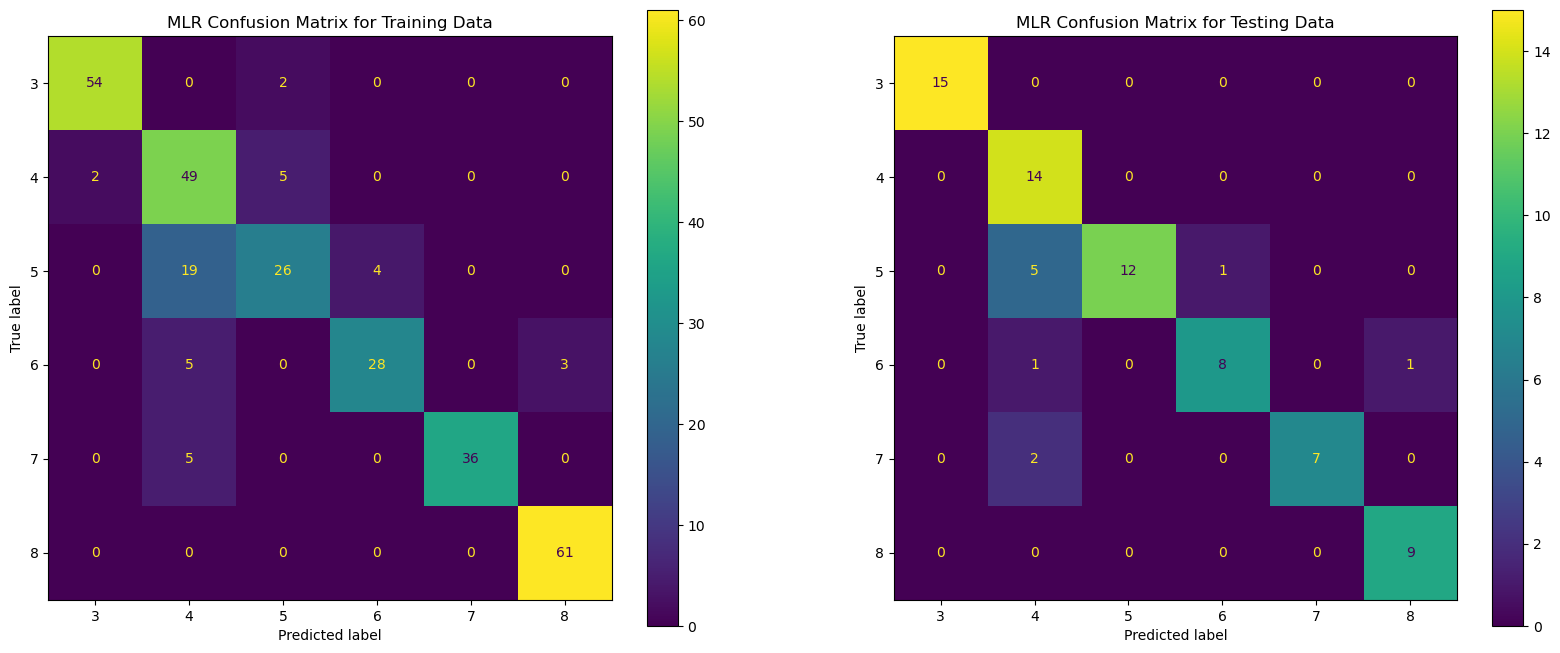

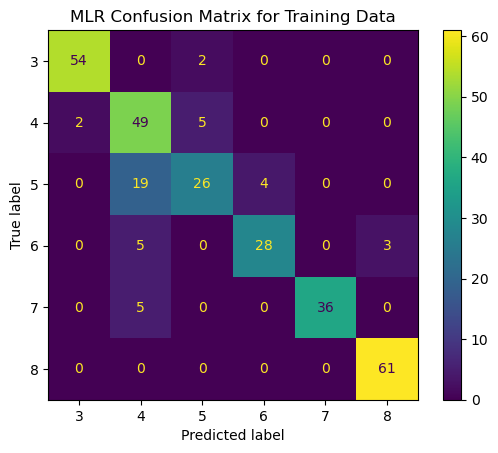

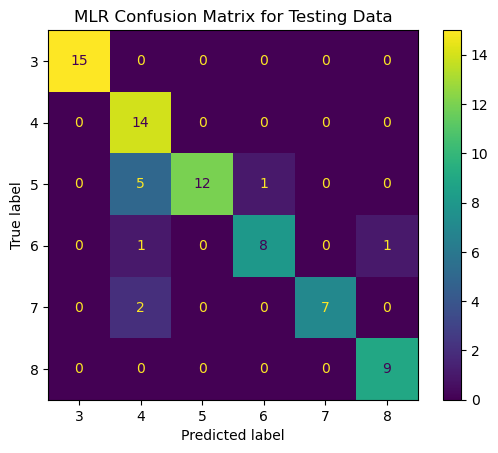

In [24]:
# logistic regression model

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# multinomial regression with cross validation for 10 folds
multi_logreg = LogisticRegressionCV(cv=10, multi_class='multinomial', solver='lbfgs', max_iter=1500, refit=True)
multi_logreg.fit(X_train, y_train)

# use multinomial logistic regression to predict on train and test sets
y_trainPredmulti = multi_logreg.predict(X_train)
y_testPredmulti = multi_logreg.predict(X_test)

# display accuracy for train and test sets
print('MLR Training Classification Report:\n',
      classification_report(y_train, y_trainPredmulti))
print(f'Accuracy: {accuracy_score(y_train, y_trainPredmulti)}\n')

print('MLR Testing Classification Report:\n',
      classification_report(y_test, y_testPredmulti))
print(f'Accuracy: {accuracy_score(y_test, y_testPredmulti)}')

# create confusion matrix for train and test sets
conf_mat_multi_train = confusion_matrix(y_train, y_trainPredmulti, labels=y_labels)
conf_mat_multi_test = confusion_matrix(y_test, y_testPredmulti, labels=y_labels)

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredmulti, ax=axes[0])
disptrain.plot()
axes[0].set_title("MLR Confusion Matrix for Training Data")
plt.title("MLR Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredmulti, ax=axes[1])
disptest.plot()
axes[1].set_title("MLR Confusion Matrix for Testing Data")
plt.title("MLR Confusion Matrix for Testing Data")
plt.show()

NB Classification Train Report:
               precision    recall  f1-score   support

           3       0.96      0.98      0.97        51
           4       0.56      0.24      0.34        58
           5       0.55      0.89      0.68        57
           6       0.91      0.74      0.82        39
           7       0.85      0.88      0.86        40
           8       0.95      1.00      0.97        54

    accuracy                           0.78       299
   macro avg       0.80      0.79      0.77       299
weighted avg       0.78      0.78      0.76       299

Train Accuracy: 0.7792642140468228

NB Classification Test Report:
               precision    recall  f1-score   support

           3       1.00      0.95      0.97        20
           4       1.00      0.25      0.40        12
           5       0.53      0.90      0.67        10
           6       0.75      0.86      0.80         7
           7       0.82      0.90      0.86        10
           8       0.94      1.

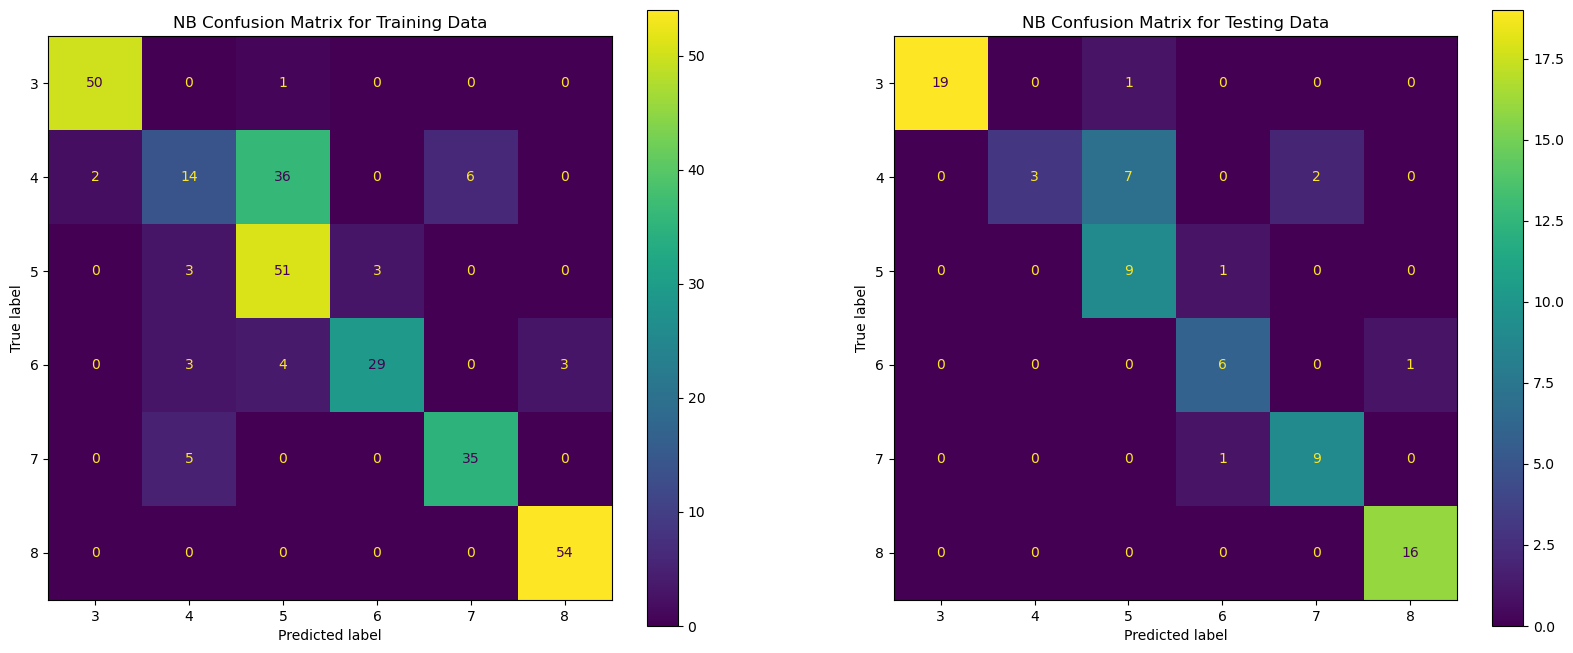

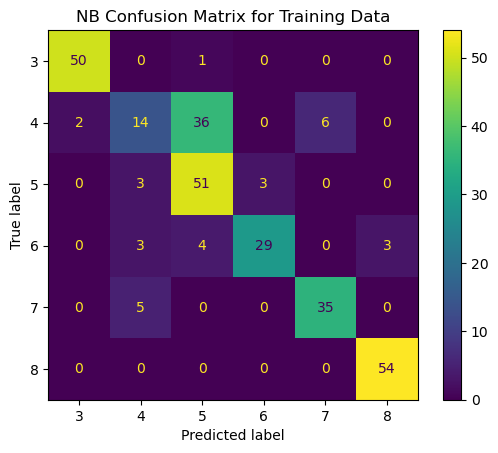

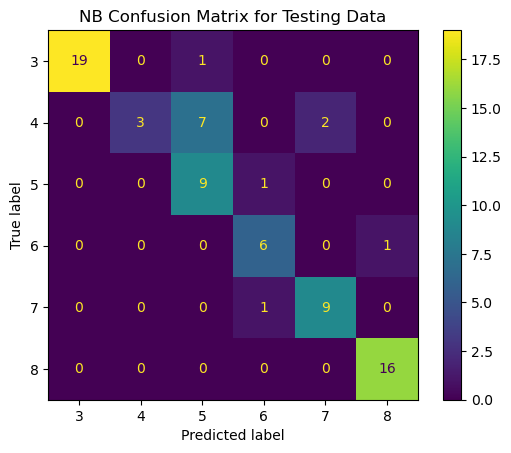

In [25]:
# naive bayes classification

# Get all y labels
y_labels = y.value_counts().index.tolist()

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# set up Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# use Naive Bayes to predict on train and test sets
y_trainPredNB = gnb.predict(X_train)
y_testPredNB = gnb.predict(X_test)

# display accuracy for train and test sets
print('NB Classification Train Report:\n',
      classification_report(y_train, y_trainPredNB))
print(f'Train Accuracy: {accuracy_score(y_train, y_trainPredNB)}\n')

print('NB Classification Test Report:\n',
      classification_report(y_test, y_testPredNB))
print(f'Test Accuracy: {accuracy_score(y_test, y_testPredNB)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredNB, ax=axes[0])
disptrain.plot()
axes[0].set_title("NB Confusion Matrix for Training Data")
plt.title("NB Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredNB, ax=axes[1])
disptest.plot()
axes[1].set_title("NB Confusion Matrix for Testing Data")
plt.title("NB Confusion Matrix for Testing Data")
plt.show()

SVM Classification Train Report:               precision    recall  f1-score   support

           3       0.96      0.96      0.96        57
           4       0.58      0.89      0.70        53
           5       0.81      0.51      0.63        51
           6       0.92      0.76      0.83        45
           7       1.00      0.85      0.92        33
           8       0.94      1.00      0.97        60

    accuracy                           0.84       299
   macro avg       0.87      0.83      0.83       299
weighted avg       0.86      0.84      0.84       299

Accuracy Train: 0.8361204013377926

SVM Classification Test Report:               precision    recall  f1-score   support

           3       1.00      1.00      1.00        14
           4       0.67      0.94      0.78        17
           5       0.90      0.56      0.69        16
           6       0.50      1.00      0.67         1
           7       1.00      0.88      0.94        17
           8       1.00      1.

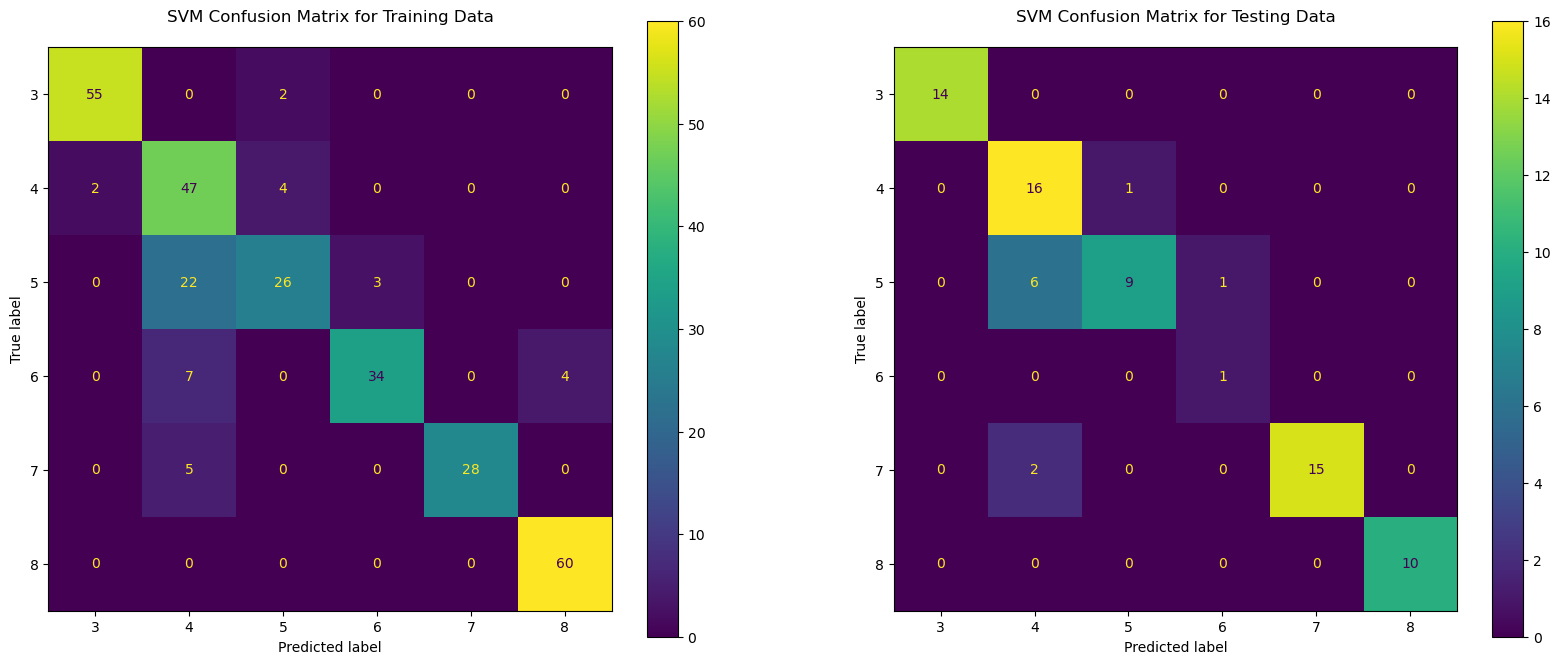

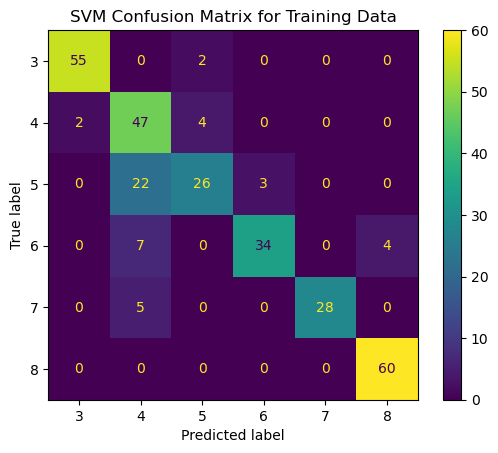

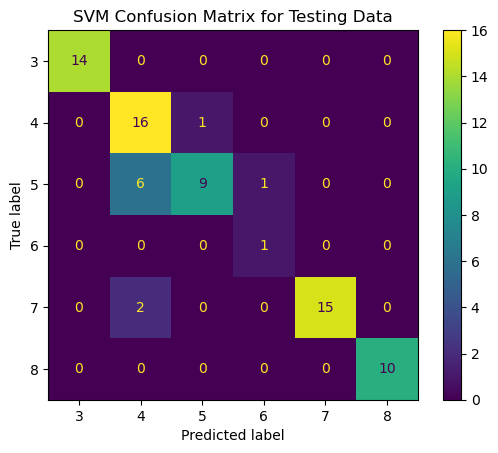

In [26]:
# creating a Support Vector Machine

# Split the data into training/testing sets with ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# creat Support Vector Machine model
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)

# use SVM to predict on train and test sets
y_trainPredSVM = svm.predict(X_train)
y_testPredSVM = svm.predict(X_test)

# display accuracy for train and test sets
print('SVM Classification Train Report:',
      classification_report(y_train, y_trainPredSVM))
print(f'Accuracy Train: {accuracy_score(y_train, y_trainPredSVM)}\n')


print('SVM Classification Test Report:',
      classification_report(y_test, y_testPredSVM))
print(f'Accuracy Test: {accuracy_score(y_test, y_testPredSVM)}')

# display confusion matrix for train and test
fig, axes = plt.subplots(1,2,figsize=(20,8))
axes = axes.flatten()
disptrain = ConfusionMatrixDisplay.from_predictions(y_train, y_trainPredSVM, ax=axes[0])
disptrain.plot()
axes[0].set_title("SVM Confusion Matrix for Training Data\n")
plt.title("SVM Confusion Matrix for Training Data")
disptest = ConfusionMatrixDisplay.from_predictions(y_test, y_testPredSVM, ax=axes[1])
disptest.plot()
axes[1].set_title("SVM Confusion Matrix for Testing Data\n")
plt.title("SVM Confusion Matrix for Testing Data")
plt.show()

In [27]:
import pickle

# save models
pickle.dump(lr, open('linear_regression_model.pkl', 'wb'))
pickle.dump(multi_logreg, open('multinomial_logistic_regression_model.pkl', 'wb'))
pickle.dump(gnb, open('naive_bayes_model.pkl', 'wb'))
pickle.dump(svm, open('support_vector_machine_model.pkl', 'wb'))